# Clustering Crypto

In [590]:
# Initial imports
#%matplotlib inline
import pandas as pd
import numpy
#import hvplot
from path import Path

#import plotly
#import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [591]:
# Load the crypto_data.csv dataset.
df=pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [592]:
df.IsTrading.value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [593]:
# Keep all the cryptocurrencies that are being traded.

# *************** MODULE 2, DELIVERABLE 1, 1st Requirement ***********************
# All cryptocurrencies that are not being traded are removed
# **********************************************************************************

df_trading=df[df["IsTrading"]==True].copy()
#df_trading.rename_axis(None, inplace=True)
print(df_trading.shape)
print(df_trading.head())

(1144, 7)
  Unnamed: 0   CoinName Algorithm  IsTrading ProofType  TotalCoinsMined  \
0         42    42 Coin    Scrypt       True   PoW/PoS     4.199995e+01   
1        365    365Coin       X11       True   PoW/PoS              NaN   
2        404    404Coin    Scrypt       True   PoW/PoS     1.055185e+09   
3        611  SixEleven   SHA-256       True       PoW              NaN   
4        808        808   SHA-256       True   PoW/PoS     0.000000e+00   

  TotalCoinSupply  
0              42  
1      2300000000  
2       532000000  
3          611000  
4               0  


In [594]:
alg={}
alg["algoriths"]=df_trading.Algorithm
df_alg=pd.DataFrame(alg)
#df_alg.to_csv("algorithms.csv", index=False)

In [595]:
df_trading.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 63.7+ KB


In [596]:
# Keep all the cryptocurrencies that have a working algorithm.

# *************** MODULE 2, DELIVERABLE 1, 2nd Requirement ***********************
# All cryptocurrencies that do not have a defined algorithm are removed
# NOTE:  My own logic regarding this:  If a coin has no 'TotalCoinSupply', then the algorithm is NOT FUNCTIONING
# **********************************************************************************

df_trading2=df_trading[df_trading.TotalCoinSupply!="0"].copy()
print(df_trading2.shape)
df_trading2.set_index(["Unnamed: 0"], inplace=True,  drop=True)
df_trading2.rename_axis(None, inplace=True)
df_trading2.head()

(1054, 7)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359


In [597]:
# Remove the "IsTrading" column. 

# *************** MODULE 2, DELIVERABLE 1, 3rd Requirement ***********************
# The IsTrading column is dropped
# **********************************************************************************

df_trading2.drop(columns=["IsTrading"], inplace=True)
print(df_trading2.shape)
df_trading2.head()

(1054, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359


In [598]:
# Remove rows that have at least 1 null value.

# *************** MODULE 2, DELIVERABLE 1, 4th Requirement ***********************
# All the rows that contain null values are removed
# **********************************************************************************

df_trading2.dropna(inplace=True, )


In [599]:
print(df_trading2.shape)
df_trading2.head()

(637, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [600]:
# Keep the rows where coins are mined.

# *************** MODULE 2, DELIVERABLE 1, 5th Requirement ***********************
# All the rows that do not have coins being mined are removed
# **********************************************************************************

df_cleaned=df_trading2[df_trading2["TotalCoinsMined"]>0].copy()
df_cleaned.shape

(497, 5)

In [601]:
# Create a new DataFrame that holds only the cryptocurrencies names.
# *************** MODULE 2, DELIVERABLE 1, 7th Requirement ***********************
# A new DataFrame is created that stores all  cryptocurrency names from the CoinName column 
# and retains the index from the crypto_df DataFrame
# **********************************************************************************

df_coins=df_cleaned.iloc[:, 0].copy()
df_coins.head()

42        42 Coin
404       404Coin
1337    EliteCoin
BTC       Bitcoin
LTC      Litecoin
Name: CoinName, dtype: object

In [602]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.

# *************** MODULE 2, DELIVERABLE 1, 6th Requirement ***********************
# The CoinName column is dropped
# **********************************************************************************



df_cleaned.drop(columns=["CoinName"], inplace=True)
#df_trading2.drop(columns=["IsTrading"], inplace=True)
df_cleaned.rename_axis(None, inplace=True)
df_cleaned.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
LTC,Scrypt,PoW,6.303924e+07,84000000


In [603]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 42 to XBC
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        497 non-null    object 
 1   ProofType        497 non-null    object 
 2   TotalCoinsMined  497 non-null    float64
 3   TotalCoinSupply  497 non-null    object 
dtypes: float64(1), object(3)
memory usage: 19.4+ KB


In [604]:
supply=df_cleaned["TotalCoinSupply"].str.replace(" ", "").copy()
supply2=df_cleaned["TotalCoinsMined"].copy()
print(supply.shape)
print(supply2.shape)

(497,)
(497,)


In [605]:
import numpy as np
sup_array=np.array(supply.values.tolist())
sup_array2=np.array(supply2.values.tolist())
print(sup_array.shape)
print(sup_array2.shape)

(497,)
(497,)


In [606]:
sup_array.reshape(-1, 1)
sup_array2.reshape(-1, 1)
df_array1=pd.DataFrame(sup_array, columns=["TotalCoinSupply"])

In [607]:
df_array2=pd.DataFrame(sup_array2, columns=["TotalCoinsMined"])

In [608]:
df_floats=pd.concat([df_array1, df_array2], axis=1)
df_floats.shape

(497, 2)

In [609]:
df_floats.head()

,TotalCoinSupply,TotalCoinsMined
0,42,4.199995e+01
1,532000000,1.055185e+09
2,314159265359,2.927942e+10
3,21000000,1.792718e+07
4,84000000,6.303924e+07


In [610]:
# Standardize the data with StandardScaler().
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled=scaler.fit_transform(df_floats)
df_scaled.shape

(497, 2)

In [611]:
df_scaled=pd.DataFrame(df_scaled, columns=["TotalCoinSupply", "TotalCoinsMined"])
df_scaled.shape

(497, 2)

In [612]:
df_scaled.head()

,TotalCoinSupply,TotalCoinsMined
0,-0.158292,-0.111155
1,-0.150687,-0.088570
2,4.332395,0.515537
3,-0.157992,-0.110771
4,-0.157091,-0.109805


In [613]:
df_objs=df_cleaned[["Algorithm", "ProofType"]].copy()
df_objs.rename_axis(None, inplace=True)
df_objs.shape

(497, 2)

In [614]:
#df_objs.reset_index(inplace=True, drop=True)

In [615]:
df_objs.head()

,Algorithm,ProofType
42,Scrypt,PoW/PoS
404,Scrypt,PoW/PoS
1337,X13,PoW/PoS
BTC,SHA-256,PoW
LTC,Scrypt,PoW


In [616]:
df_objs.tail()

,Algorithm,ProofType
ZEPH,SHA-256,DPoS
GAP,Scrypt,PoW/PoS
BDX,CryptoNight,PoW
ZEN,Equihash,PoW
XBC,Scrypt,PoS


In [617]:
#df_ready=pd.concat([df_objs, df_scaled], axis=1)


In [618]:
#df_ready.shape

In [619]:
df_final=df_objs.copy()

In [620]:
df_final["TotalCoinSupply"]=df_scaled["TotalCoinSupply"].copy().to_list()

In [621]:
df_final["TotalCoinsMined"]=df_scaled["TotalCoinsMined"].copy().to_list()

In [622]:
df_final.shape

(497, 4)

In [623]:
df_final.head()

,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined
42,Scrypt,PoW/PoS,-0.158292,-0.111155
404,Scrypt,PoW/PoS,-0.150687,-0.088570
1337,X13,PoW/PoS,4.332395,0.515537
BTC,SHA-256,PoW,-0.157992,-0.110771
LTC,Scrypt,PoW,-0.157091,-0.109805


In [624]:
# Use get_dummies() to create variables for text features.
x=pd.get_dummies(df_objs)
#df_dumms=pd.get_dummies(df_final)

In [625]:
# *************** MODULE 2, DELIVERABLE 1, 8th Requirement ***********************
# The get_dummies() method is used to create variables for the text features, which are then stored in a new DataFrame, 'x'
# **********************************************************************************

x.rename_axis(None, inplace=True)
x.head()

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [626]:
# *************** MODULE 2, DELIVERABLE 1, 9th Requirement ***********************
# The features from the 'x' DataFrame have been standardized using the StandardScaler fit_tranform() function

df_scaled_x=scaler.fit_transform(x)
df_scaled_x.shape

(497, 93)

In [627]:
df_scaled_x[0:5]

array([[-0.04490133, -0.04490133, -0.06356417, -0.07792865, -0.04490133,
        -0.04490133, -0.06356417, -0.04490133, -0.04490133, -0.1993714 ,
        -0.06356417, -0.09007547, -0.04490133, -0.10080973, -0.07792865,
        -0.04490133, -0.04490133, -0.15729675, -0.04490133, -0.1279059 ,
        -0.04490133, -0.04490133, -0.07792865, -0.04490133, -0.04490133,
        -0.04490133, -0.04490133, -0.06356417, -0.04490133, -0.09007547,
        -0.09007547, -0.09007547, -0.04490133, -0.11952286, -0.13580362,
        -0.14329648, -0.04490133, -0.06356417, -0.04490133, -0.07792865,
        -0.1823843 , -0.04490133, -0.04490133, -0.04490133, -0.06356417,
        -0.16388869, -0.32696213, -0.04490133, -0.09007547, -0.07792865,
        -0.06356417,  1.39313618, -0.04490133, -0.04490133, -0.06356417,
        -0.04490133, -0.04490133, -0.04490133, -0.04490133, -0.04490133,
        -0.04490133, -0.04490133, -0.04490133, -0.39132116, -0.04490133,
        -0.17025131, -0.04490133, -0.09007547, -0.0

In [628]:
#df_dumms.shape

In [629]:
#df_dumms.head()

### Deliverable 2: Reducing Data Dimensions Using PCA

In [630]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
x_pca = pca.fit_transform(df_scaled_x)

In [631]:
# Create a DataFrame with the three principal components.

# *************** MODULE 2, DELIVERABLE 2, 1st Requirement ***********************
# The PCA algorithm reduces the dimensions of the 'x' DataFrame down to 3 principal components
# **********************************************************************************

pcs_df=pd.DataFrame(data=x_pca, columns=["PC 1", "PC 2", "PC 3"])
pcs_df.head()

,PC 1,PC 2,PC 3
0,0.942874,-0.671728,1.507996e-13
1,0.942874,-0.671728,1.525089e-13
2,1.757483,-0.753220,1.661281e-13
3,-1.245490,0.230854,-4.966065e-14
4,-1.155742,0.021646,-9.303957e-16


In [632]:
ind=x.index

In [633]:
type(ind)

pandas.core.indexes.base.Index

In [634]:
# *************** MODULE 2, DELIVERABLE 2, 2nd Requirement ***********************
# The pcs_df DataFrame is created and has the following 3 columns PC 1, PC 2, PC 3
# and has the index from the crypto_df DataFrame
# **********************************************************************************


pcs_df.set_index(ind, inplace=True)

pcs_df.rename_axis(None, inplace=True)
pcs_df.head()

,PC 1,PC 2,PC 3
42,0.942874,-0.671728,1.507996e-13
404,0.942874,-0.671728,1.525089e-13
1337,1.757483,-0.753220,1.661281e-13
BTC,-1.245490,0.230854,-4.966065e-14
LTC,-1.155742,0.021646,-9.303957e-16


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [635]:
inertia=[]
K=range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(pcs_df)
    inertia.append(kmeanModel.inertia_)



C:\Users\E7470\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [636]:
from matplotlib import pyplot as plt

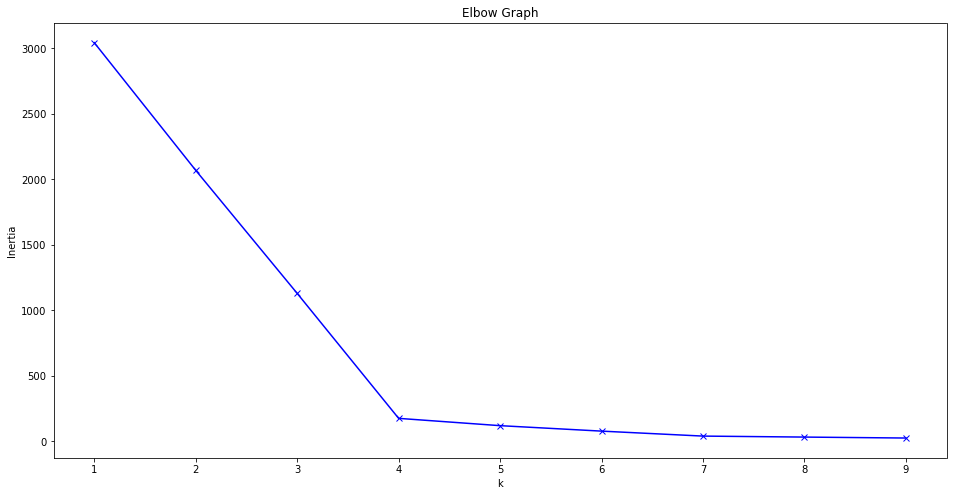

In [637]:
# Create an elbow curve to find the best value for K.

# *************** MODULE 2, DELIVERABLE 3, 1st Requirement ***********************
# Create an elbow curve (but my systems would not allow hvplot) in matplotlib
# **********************************************************************************

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Graph')
plt.show()

Running K-Means with `k=4`

In [638]:
# Initialize the K-Means model.

kmeanModel=KMeans(n_clusters=4)

# Fit the model
kmeanModel.fit(pcs_df)

# Predict clusters

# *************** MODULE 2, DELIVERABLE 3, 2nd Requirement ***********************
# Predictions are made on the K clusters of the cryptocurrencies’ data
# **********************************************************************************
 
predictions = kmeanModel.predict(pcs_df)

In [639]:
pcs_df.head()

,PC 1,PC 2,PC 3
42,0.942874,-0.671728,1.507996e-13
404,0.942874,-0.671728,1.525089e-13
1337,1.757483,-0.753220,1.661281e-13
BTC,-1.245490,0.230854,-4.966065e-14
LTC,-1.155742,0.021646,-9.303957e-16


In [640]:
pcs_df.shape

(497, 3)

In [641]:
df_final.shape

(497, 4)

In [642]:
df_final.head()

,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined
42,Scrypt,PoW/PoS,-0.158292,-0.111155
404,Scrypt,PoW/PoS,-0.150687,-0.088570
1337,X13,PoW/PoS,4.332395,0.515537
BTC,SHA-256,PoW,-0.157992,-0.110771
LTC,Scrypt,PoW,-0.157091,-0.109805


In [643]:
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [644]:
df_raw=df.set_index(["Unnamed: 0"], inplace=True,  drop=True)
df_raw=df.rename_axis(None, inplace=True)

In [650]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
#df_concat=pd.concat([df, pcs_df], axis=1)
df_concat2=pcs_df.join(df, how="inner")
print(df_concat2.shape) # (497, 9)
print(df_concat2.head())

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
# YOUR CODE HERE

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
df_concat2["Class"] = kmeanModel.labels_

# Print the shape of the clustered_df
#print(clustered_df.shape)
#clustered_df.head(10)

(497, 9)
          PC 1      PC 2          PC 3   CoinName Algorithm  IsTrading  \
42    0.942874 -0.671728  1.507996e-13    42 Coin    Scrypt       True   
404   0.942874 -0.671728  1.525089e-13    404Coin    Scrypt       True   
1337  1.757483 -0.753220  1.661281e-13  EliteCoin       X13       True   
BTC  -1.245490  0.230854 -4.966065e-14    Bitcoin   SHA-256       True   
LTC  -1.155742  0.021646 -9.303957e-16   Litecoin    Scrypt       True   

     ProofType  TotalCoinsMined TotalCoinSupply  
42     PoW/PoS     4.199995e+01              42  
404    PoW/PoS     1.055185e+09       532000000  
1337   PoW/PoS     2.927942e+10    314159265359  
BTC        PoW     1.792718e+07        21000000  
LTC        PoW     6.303924e+07        84000000  


In [651]:
df_concat2.head()

,PC 1,PC 2,PC 3,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,Class
42,0.942874,-0.671728,1.507996e-13,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42,1
404,0.942874,-0.671728,1.525089e-13,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000,1
1337,1.757483,-0.753220,1.661281e-13,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359,1
BTC,-1.245490,0.230854,-4.966065e-14,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000,0
LTC,-1.155742,0.021646,-9.303957e-16,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000,0


In [652]:
# *************** MODULE 2, DELIVERABLE 3, 3rd Requirement ***********************
# Creat a new DataFrame is created with the same index as the crypto_df DataFrame 
# and has the following columns: Algorithm, ProofType, TotalCoinsMined, 
# TotalCoinSupply, PC 1, PC 2, PC 3, CoinName, and Class
# **********************************************************************************


clustered_df = df_concat2.copy()
clustered_df.head()

,PC 1,PC 2,PC 3,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,Class
42,0.942874,-0.671728,1.507996e-13,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42,1
404,0.942874,-0.671728,1.525089e-13,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000,1
1337,1.757483,-0.753220,1.661281e-13,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359,1
BTC,-1.245490,0.230854,-4.966065e-14,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000,0
LTC,-1.155742,0.021646,-9.303957e-16,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

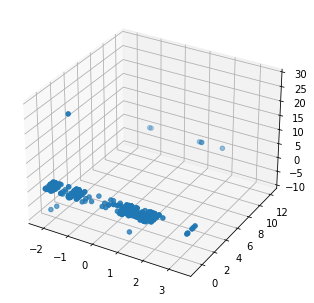

In [658]:
# Creating a 3D-Scatter with the PCA data and the clusters


# *************** MODULE 2, DELIVERABLE 4, 1st Requirement ***********************
# Creat a 3-D scatter plot of the clusters
# **********************************************************************************


from mpl_toolkits.mplot3d import Axes3D
import random
fig = plt.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = clustered_df["PC 1"]
sequence_containing_y_vals = clustered_df["PC 2"]
sequence_containing_z_vals = clustered_df["PC 3"]

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()





In [662]:
# Create a table with tradable cryptocurrencies.
final_table=clustered_df.drop(columns=["PC 1", "PC 2", "PC 3"])
final_table.reset_index(inplace=True, drop=True)
final_table.head()

# *************** MODULE 2, DELIVERABLE 4, 2nd Requirement ***********************
#  Create a table with tradable cryptocurrencies
# **********************************************************************************
 

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,Class
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42,1
1,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000,1
2,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359,1
3,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000,0
4,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000,0


In [663]:
# Print the total number of tradable cryptocurrencies.

# *************** MODULE 2, DELIVERABLE 4, 3rd Requirement ***********************
#  Print the total number of tradable cryptocurrencies.
# **********************************************************************************

print(len(final_table))

497


In [666]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
df_scaled_x[0:5]

array([[-0.04490133, -0.04490133, -0.06356417, -0.07792865, -0.04490133,
        -0.04490133, -0.06356417, -0.04490133, -0.04490133, -0.1993714 ,
        -0.06356417, -0.09007547, -0.04490133, -0.10080973, -0.07792865,
        -0.04490133, -0.04490133, -0.15729675, -0.04490133, -0.1279059 ,
        -0.04490133, -0.04490133, -0.07792865, -0.04490133, -0.04490133,
        -0.04490133, -0.04490133, -0.06356417, -0.04490133, -0.09007547,
        -0.09007547, -0.09007547, -0.04490133, -0.11952286, -0.13580362,
        -0.14329648, -0.04490133, -0.06356417, -0.04490133, -0.07792865,
        -0.1823843 , -0.04490133, -0.04490133, -0.04490133, -0.06356417,
        -0.16388869, -0.32696213, -0.04490133, -0.09007547, -0.07792865,
        -0.06356417,  1.39313618, -0.04490133, -0.04490133, -0.06356417,
        -0.04490133, -0.04490133, -0.04490133, -0.04490133, -0.04490133,
        -0.04490133, -0.04490133, -0.04490133, -0.39132116, -0.04490133,
        -0.17025131, -0.04490133, -0.09007547, -0.0

In [667]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
df_last=df_final.drop(columns=["Algorithm", "ProofType"])
df_last.head()

,TotalCoinSupply,TotalCoinsMined
42,-0.158292,-0.111155
404,-0.150687,-0.088570
1337,4.332395,0.515537
BTC,-0.157992,-0.110771
LTC,-0.157091,-0.109805


In [670]:
# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 

# *************** MODULE 2, DELIVERABLE 4, 4th Requirement ***********************
#  Create a table with tradable cryptocurrencies
# **********************************************************************************

df_last["CoinName"]=final_table["CoinName"].to_list()
df_last["Class"]=final_table["Class"].to_list()
df_last.head()


,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,-0.158292,-0.111155,42 Coin,1
404,-0.150687,-0.088570,404Coin,1
1337,4.332395,0.515537,EliteCoin,1
BTC,-0.157992,-0.110771,Bitcoin,0
LTC,-0.157091,-0.109805,Litecoin,0


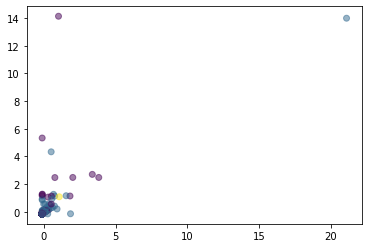

In [672]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".

# *************** MODULE 2, DELIVERABLE 4, 5th Requirement ***********************
#  Create a scatter plot is created where the X-axis is "TotalCoinsMined",
#  the Y-axis is "TotalCoinSupply"
# **********************************************************************************


colors = df_last.Class
plt.scatter(df_last.TotalCoinsMined, df_last.TotalCoinSupply, c=colors, alpha=0.5)
plt.show()
